# Pandas Test - Real life Exercise

In [109]:
import pandas as pd
import math
from scipy.stats import norm

For visualizations:

In [110]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [111]:
ad_recs_annotated = pd.read_csv('data/ad_annotations.csv')
df=ad_recs_annotated
df.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
101959,2021-week_40,AD089ECJLT,Search Million Culture,DE,yes,NaN,Qality,DNNQ
197738,2021-week_46,AD08CXLW86,Extreme DA,US,yes,NaN,Yield,DNNY
281152,2022-week_01,AD008DDEJJ,MoJoe Brewing Company,JP,yes,NaN,Yield,DNNY
236492,2021-week_49,AD07JYV98P,Puentes Company,IN,yes,NaN,Yield,UserPopY
240484,2021-week_49,AD09YJ86D8,Extreme DA,US,yes,NaN,Yield,UserPopY


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

1. Add a column with the sample year
1. Add a column with the sample quarter (google how to)
1. Add a new success column with values 1 and 0 for yes and no 
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
1. Capitlize (first letter only) the is_success column (Inplace)

#### A to Q1:

In [112]:
df['year'] = df.week_id.apply(lambda w: w.split('-')[0])

#### A to Q2:

In [113]:
df['quarter'] = df.week_id.apply(lambda w: int(w.split('_')[1]) // 13 + 1)

#### A to Q3:

In [114]:
df['is_success_int'] = df.is_success.map({'yes': 1, 'no': 0})
df.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int
79757,2021-week_38,AD08MWD788,RelayFoods,IN,no,False,Qality,UserPopQ,2021,3,0
135279,2021-week_42,AD07W8MX8C,Puentes Company,IN,yes,NaN,Yield,ManualQ,2021,4,1
2346,2021-week_33,AD07N98LM,Search Million Culture,DE,yes,NaN,Yield,RuleBasedY,2021,3,1
222546,2021-week_48,AD098MQ8W8,Puentes Company,IN,no,False,Yield,RuleBasedY,2021,4,0
90494,2021-week_39,AD077JY8XS,Fancy,GB,yes,NaN,Qality,DNNQ,2021,4,1


#### A to Q4:

In [115]:
df.is_sever.isnull().sum() # Yes, we have NaNs 

304195

In [116]:
df[df.is_sever.notnull()].is_success.value_counts()

no     69576
yes       17
Name: is_success, dtype: int64

In [117]:
df['is_sever_fixed'] = df.is_sever.fillna(False)
df['is_sever_fixed'].isnull().sum()

0

In [118]:
df.is_sever.value_counts(dropna=False)

NaN      304195
True      44689
False     24904
Name: is_sever, dtype: int64

### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DDNQ, RRNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

#### A to Q1:

In [119]:
print(df[df.region == "US"].shape[0])
print(df.query("region == 'US'").shape[0])

103846
103846


#### A to Q2:

In [120]:
print(df[(df.region == "US") & (df.is_success == "yes")].shape[0])
print(df.query('region == "US" and is_success == "yes"').shape[0])

88918
88918


#### A to Q4:

In [121]:
print(df[(df.rec_provider=='DDNQ') | (df.rec_provider=='RRNY') | (df.rec_provider=='UserPopQ')].shape[0])
print(df.query("rec_provider=='DDNQ'| rec_provider=='RRNY' | rec_provider=='UserPopQ'").shape[0])

69937
69937


#### A to Q5:

In [122]:
df[df.rec_provider.str[0:9]=='RuleBased'].shape[0]

28336

#### A to Q6:

In [123]:
df[df.year.astype(int)>=2021].requester.count()

373788

#### A to Q7:

In [124]:
week_number=df.week_id.apply(lambda w: int(w.split('_')[1])) 
df[(week_number>=30) & (week_number<=40)]
# df.query('week_number>=30 & week_number<=40')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_fixed
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY,2021,3,1,False
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False
3,2021-week_33,AD89608808,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2021,3,1,False
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
115046,2021-week_40,AD07XH8N9W,Sensor Tower,US,yes,NaN,Qality,DNNQ,2021,4,1,False
115047,2021-week_40,AD097JK9F8,Extreme DA,US,yes,NaN,Yield,RNNY,2021,4,1,False
115048,2021-week_40,AD086WDR8S,Extreme DA,US,yes,NaN,Yield,DNNY,2021,4,1,False
115049,2021-week_40,AD07J897RY,Sensor Tower,US,yes,NaN,Yield,DNNY,2021,4,1,False


#### A to Q8:

In [125]:
df[df.ad_id==df.ad_id.value_counts().idxmax()]
# df.query('ad_id == ad_id.value_counts().idxmax()')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_fixed
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ,2021,3,1,False
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ,2021,3,1,False
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ,2021,3,1,False
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ,2021,3,1,False
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ,2021,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ,2022,5,1,False
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ,2022,5,1,False
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ,2022,5,1,False
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ,2022,5,1,False


#### A to Q9:

In [126]:
df[df.rec_provider==df.rec_provider.value_counts().idxmin()]
# df.query('rec_provider == rec_provider.value_counts().idxmin()')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_fixed
352263,2022-week_06,AD0088UP8R,MoJoe Brewing Company,JP,yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352326,2022-week_06,AD09C8KC8Z,MoJoe Brewing Company,JP,yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352578,2022-week_06,AD078DT6GJ,MoJoe Brewing Company,JP,yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352595,2022-week_06,AD09C8P789,MoJoe Brewing Company,JP,yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352703,2022-week_06,AD00UF8VOF,MoJoe Brewing Company,JP,yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352714,2022-week_06,AD098CXHRF,MoJoe Brewing Company,JP,yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352738,2022-week_06,AD0086GLW0,MoJoe Brewing Company,JP,yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352740,2022-week_06,AD08QMJ888,MoJoe Brewing Company,JP,yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352745,2022-week_06,AD07H9GM98,MoJoe Brewing Company,JP,yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352803,2022-week_06,AD09G9YKC8,MoJoe Brewing Company,JP,no,False,Yield,UserPopSelectionY,2022,1,0,False


#### A to Q10:

In [127]:
df[df.is_sever.isnull()].shape[0]
# df.query('is_sever.isnull()').shape[0]

304195

#### A to Q11:

In [128]:
three_words_requesters = df[df.requester.apply(lambda s: len(s.split(' ')) == 3)]
three_words_requesters.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_fixed
275983,2022-week_01,AD008UE60E,MoJoe Brewing Company,GB,yes,NaN,Yield,DNNY,2022,1,1,False
360966,2022-week_52,AD088ZQQWA,Search Million Culture,GB,yes,NaN,Qality,RNNQ,2022,5,1,False
164125,2021-week_44,AD078SHDWN,Search Million Culture,IN,yes,NaN,Qality,UserPopQ,2021,4,1,False
253007,2021-week_50,AD078W98X8,MoJoe Brewing Company,IN,yes,NaN,Yield,UserPopY,2021,4,1,False
45586,2021-week_36,AD07JJN88Z,Search Million Culture,GB,yes,NaN,Qality,DNNQ,2021,3,1,False


In [129]:
three_words_requesters.shape[0]

118141

#### A to Q12:

In [130]:
three_words_requesters[three_words_requesters.ad_id.apply(lambda s: '6' in s)]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_fixed
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False
3,2021-week_33,AD89608808,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2021,3,1,False
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False
11,2021-week_33,AD88967068,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2021,3,1,False
41,2021-week_33,AD07L6JC8W,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY,2021,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
373364,2022-week_52,AD06XJR86M,MoJoe Brewing Company,US,yes,NaN,Yield,RuleBasedY,2022,5,1,False
373394,2022-week_52,AD08Y6R9WV,MoJoe Brewing Company,US,yes,NaN,Yield,DNNY,2022,5,1,False
373511,2022-week_52,AD09C68T8Y,MoJoe Brewing Company,US,yes,NaN,Yield,DNNY,2022,5,1,False
373691,2022-week_52,AD08M86WW8,MoJoe Brewing Company,US,yes,NaN,Yield,DNNY,2022,5,1,False


#### A to Q13:

In [131]:
def product_digits(s):
    x=''.join(c for c in s if c.isdigit())
    return math.prod(int(i) for i in x)

In [132]:
three_words_requesters[three_words_requesters.ad_id.apply(product_digits)>30]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_fixed
37,2021-week_33,AD88898888,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2021,3,1,False
76,2021-week_33,AD88898786,MoJoe Brewing Company,DE,yes,NaN,Yield,BooksY,2021,3,1,False
112,2021-week_33,AD88788887,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2021,3,1,False
162,2021-week_33,AD88887688,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2021,3,1,False
174,2021-week_33,AD88888876,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2021,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
360315,2022-week_52,AD89888888,MoJoe Brewing Company,GB,yes,NaN,Yield,ManualQ,2022,5,1,False
362075,2022-week_52,AD88888997,Search Million Culture,GB,yes,NaN,Qality,UserPopQ,2022,5,1,False
362199,2022-week_52,AD88688888,Mission Street Manufacturing,GB,no,False,Qality,UserPopQ,2022,5,0,False
363286,2022-week_52,AD88887888,Search Million Culture,GB,yes,NaN,Qality,UserPopQ,2022,5,1,False


### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


#### A to Q1:

In [133]:
sorted(df.week_id.unique())

['2021-week_33',
 '2021-week_34',
 '2021-week_35',
 '2021-week_36',
 '2021-week_37',
 '2021-week_38',
 '2021-week_39',
 '2021-week_40',
 '2021-week_41',
 '2021-week_42',
 '2021-week_43',
 '2021-week_44',
 '2021-week_45',
 '2021-week_46',
 '2021-week_47',
 '2021-week_48',
 '2021-week_49',
 '2021-week_50',
 '2021-week_51',
 '2022-week_01',
 '2022-week_02',
 '2022-week_03',
 '2022-week_04',
 '2022-week_05',
 '2022-week_06',
 '2022-week_52']

In [134]:
df.week_id.value_counts().sort_index()

2021-week_33    14356
2021-week_34    14371
2021-week_35    14373
2021-week_36    14390
2021-week_37    14392
2021-week_38    14347
2021-week_39    14416
2021-week_40    14406
2021-week_41    14380
2021-week_42    14376
2021-week_43    14367
2021-week_44    14299
2021-week_45    14440
2021-week_46    14350
2021-week_47    14402
2021-week_48    14404
2021-week_49    14337
2021-week_50    14404
2021-week_51    12805
2022-week_01    14385
2022-week_02    14423
2022-week_03    14317
2022-week_04    14367
2022-week_05    14362
2022-week_06    14389
2022-week_52    15930
Name: week_id, dtype: int64

#### A to Q2:

Option 1:

In [135]:
df['week_number'] = df.week_id.apply(lambda x: int(x.split('_')[1]))

In [136]:
df.groupby('region').week_number.unique()

region
DE    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
GB    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
IN    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
JP    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
US    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
Name: week_number, dtype: object

In [137]:
def find_missing_week_id(week_ids):
    missing_weeks = []
    for i in range (33, 53):
        if i not in week_ids:
            missing_weeks.append(i)
    return missing_weeks

In [138]:
df.groupby('region').week_number.unique().apply(find_missing_week_id)

region
DE      []
GB      []
IN      []
JP    [51]
US      []
Name: week_number, dtype: object

Option 2:

In [139]:
row_count_per_week_and_region = df.groupby(['week_id', 'region']).size()
row_count_per_week_and_region.head()

week_id       region
2021-week_33  DE        2395
              GB        3180
              IN        3196
              JP        1611
              US        3974
dtype: int64

In [140]:
row_count_per_week_and_region = row_count_per_week_and_region.unstack('region')
row_count_per_week_and_region.head()

region,DE,GB,IN,JP,US
week_id,,,,,
2021-week_33,2395.0,3180.0,3196.0,1611.0,3974.0
2021-week_34,2360.0,3187.0,3219.0,1599.0,4006.0
2021-week_35,2393.0,3209.0,3209.0,1580.0,3982.0
2021-week_36,2401.0,3209.0,3213.0,1589.0,3978.0
2021-week_37,2404.0,3181.0,3183.0,1644.0,3980.0


In [141]:
row_count_per_week_and_region.sample().iloc[0]

region
DE    2418.0
GB    3218.0
IN    3143.0
JP    1615.0
US    4010.0
Name: 2021-week_48, dtype: float64

In [142]:
def count_nans_in_row(row):
    return row.isnull().sum()

In [143]:
row_count_per_week_and_region.apply(count_nans_in_row, axis=1)

week_id
2021-week_33    0
2021-week_34    0
2021-week_35    0
2021-week_36    0
2021-week_37    0
2021-week_38    0
2021-week_39    0
2021-week_40    0
2021-week_41    0
2021-week_42    0
2021-week_43    0
2021-week_44    0
2021-week_45    0
2021-week_46    0
2021-week_47    0
2021-week_48    0
2021-week_49    0
2021-week_50    0
2021-week_51    1
2022-week_01    0
2022-week_02    0
2022-week_03    0
2022-week_04    0
2022-week_05    0
2022-week_06    0
2022-week_52    0
dtype: int64

In [144]:
count_nans_in_row(row_count_per_week_and_region.iloc[0])

0

In [145]:
count_nans_in_row(pd.Series([None, 1, 2, None]))

2

In [146]:
df.groupby(['week_id', 'region']).size().unstack(['region']).apply(lambda col: 'None' if col.isnull().sum() == 0 else col[col.isnull()].index,axis=0)

region
DE                                                 None
GB                                                 None
IN                                                 None
JP    Index(['2021-week_51'], dtype='object', name='...
US                                                 None
dtype: object

In [147]:
print(f'Number of region available in the data : {df.region.value_counts().shape[0]}')

Number of region available in the data : 5


A to Q3:

In [148]:
df.groupby(['region','week_id']).ad_id.count()

region  week_id     
DE      2021-week_33    2395
        2021-week_34    2360
        2021-week_35    2393
        2021-week_36    2401
        2021-week_37    2404
                        ... 
US      2022-week_03    3979
        2022-week_04    3999
        2022-week_05    3998
        2022-week_06    3992
        2022-week_52    3998
Name: ad_id, Length: 129, dtype: int64

#### A to Q4:

In [149]:
print(f'Number of NaN in is_sever column : {df.is_sever.isna().sum()}')

Number of NaN in is_sever column : 304195


#### A to Q5:

In [150]:
groupby_week=df.groupby('week_id').ad_id.value_counts()
groupby_week[groupby_week>1].sample(5)

max_count_ad_idx=groupby_week.idxmax()
max_count_ad=groupby_week.loc[max_count_ad_idx]
                      
print(f'ad {max_count_ad_idx[1]} where sent {max_count_ad} times at {max_count_ad_idx[0]}')

ad AD098SWYF6 where sent 81 times at 2021-week_40


#### A to Q6:

In [151]:
groupby_ad=df.groupby('ad_id').week_id.count()
ad_max_count_week_idx=groupby_ad.idxmax()
max_count_week=groupby_ad[ad_max_count_week_idx]

print(f'ad {ad_max_count_week_idx} where sent in different {max_count_week} weeks')

ad AD07PFFMP9 where sent in different 247 weeks


In [152]:
df[df.ad_id==ad_max_count_week_idx].week_id

7031      2021-week_33
7032      2021-week_33
20010     2021-week_34
20011     2021-week_34
35214     2021-week_35
              ...     
363533    2022-week_52
363534    2022-week_52
363535    2022-week_52
363536    2022-week_52
365817    2022-week_52
Name: week_id, Length: 247, dtype: object

In [153]:
ad_success=df[df.is_success=='yes']
ad_no_success=df[df.is_success=='no']

print(pd.merge(ad_success, ad_no_success, on=['ad_id'], how='inner')[['ad_id','week_id_x','is_success_x','week_id_y','is_success_y']].head())

       ad_id     week_id_x is_success_x     week_id_y is_success_y
0  AD07H9DVL  2021-week_33          yes  2021-week_40           no
1  AD07H9DVL  2021-week_33          yes  2021-week_41           no
2  AD07H9DVL  2021-week_35          yes  2021-week_40           no
3  AD07H9DVL  2021-week_35          yes  2021-week_41           no
4  AD07H9DVL  2021-week_40          yes  2021-week_40           no


#### A to Q7:

In [154]:
sever_na_success_yes=df[(df.is_sever.isna()) & (df.is_success=='yes')].shape[0]
sever_na_success_no=df[(df.is_sever.isna()) & (df.is_success=='no')].shape[0]

print(f'Number of is_sever=NaN and is_success=yes id : {sever_na_success_yes}')
print(f'Number of is_sever=NaN and is_success=yes id : {sever_na_success_no}')

sever_true_success_no=df[(df.is_sever==True) & (df.is_success=='no')].shape[0]
sever_false_success_no=df[(df.is_sever==False) & (df.is_success=='no')].shape[0]

print(f'Number of is_sever=true  and is_success=no   : {sever_true_success_no}')
print(f'Number of is_sever=false and is_success=no   : {sever_false_success_no}')

Number of is_sever=NaN and is_success=yes id : 304189
Number of is_sever=NaN and is_success=yes id : 6
Number of is_sever=true  and is_success=no   : 44677
Number of is_sever=false and is_success=no   : 24899


#### A to Q8:

In [155]:
df.groupby(['region','week_number']).recommendation_type.value_counts().unstack().apply(lambda r:r['Qality']/r['Yield'], axis=1).rename('Qality/Yield Ratio')

region  week_number
DE      1              5.388298
        2              5.523161
        3              3.784708
        4              6.232416
        5              4.631206
                         ...   
US      48             0.446087
        49             1.051361
        50             0.877234
        51             0.433286
        52             0.481289
Name: Qality/Yield Ratio, Length: 129, dtype: float64

#### A to Q9:

In [156]:
df.requester.nunique()

36

#### A to Q10:

In [157]:
df.groupby('region').requester.value_counts().groupby(level=0).head(5)

region  requester             
DE      Search Million Culture    23657
        RelayFoods                17313
        MoJoe Brewing Company      8616
        iDreamsky Technology       3542
        SOLOMO365                  2435
GB      Search Million Culture    28002
        RelayFoods                15920
        Fancy                     13678
        MoJoe Brewing Company      9530
        iDreamsky Technology       3919
IN      Puentes Company           29427
        Search Million Culture    21365
        RelayFoods                17352
        MoJoe Brewing Company      7191
        iDreamsky Technology       1995
JP      RelayFoods                24574
        Search Million Culture     7906
        MoJoe Brewing Company      3549
        LocalVox Media             1724
        Tab Solutions              1366
US      Extreme DA                57215
        Fancy                     18668
        Tab Solutions              9790
        Search Million Culture     5610
        S

#### A to Q11:

In [158]:
df.rec_provider.unique()

array(['DNNQ', 'DNNY', 'BooksQ', 'UserPopQ', 'UserPopY', 'RuleBasedY',
       'ManualY', 'ManualQ', 'BooksY', 'XGBQ', 'XGBY', 'RNNQ', 'RNNY',
       'RuleBased', 'UserPopSelectionQ', 'UserPopSelectionY'],
      dtype=object)

#### A to Q12:

In [159]:
df.groupby('region').rec_provider.nunique()

region
DE     9
GB    12
IN     6
JP     9
US    14
Name: rec_provider, dtype: int64

#### A to Q13:

In [160]:
df.groupby('rec_provider').recommendation_type.nunique()

rec_provider
BooksQ               1
BooksY               1
DNNQ                 1
DNNY                 1
ManualQ              2
ManualY              2
RNNQ                 1
RNNY                 1
RuleBased            1
RuleBasedY           1
UserPopQ             1
UserPopSelectionQ    1
UserPopSelectionY    1
UserPopY             1
XGBQ                 1
XGBY                 1
Name: recommendation_type, dtype: int64

In [161]:
df.groupby('rec_provider').recommendation_type.nunique().reset_index().query('recommendation_type != 1')

,rec_provider,recommendation_type
4,ManualQ,2
5,ManualY,2


In [162]:
(df.groupby('rec_provider').recommendation_type!=1)

True

#### A to Q14:

In [163]:
df.groupby(['rec_provider','recommendation_type'])[['rec_provider','recommendation_type']].value_counts()

rec_provider       recommendation_type
BooksQ             Qality                   1720
BooksY             Yield                    4150
DNNQ               Qality                 117424
DNNY               Yield                   45116
ManualQ            Qality                  10220
                   Yield                    3624
ManualY            Qality                   1439
                   Yield                     543
RNNQ               Qality                  20983
RNNY               Yield                   12732
RuleBased          Qality                    182
RuleBasedY         Yield                   28154
UserPopQ           Qality                  69937
UserPopSelectionQ  Qality                   2417
UserPopSelectionY  Yield                      21
UserPopY           Yield                   38600
XGBQ               Qality                  12250
XGBY               Yield                    4276
dtype: int64

In [164]:
df[df.rec_provider.str[-1]!=df.recommendation_type.str[0]][['rec_provider','recommendation_type']]

,rec_provider,recommendation_type
24,ManualY,Qality
313,ManualY,Qality
314,ManualY,Qality
315,ManualY,Qality
316,ManualY,Qality
...,...,...
373203,ManualQ,Yield
373272,ManualY,Qality
373570,ManualQ,Yield
373584,ManualQ,Yield


In [165]:
l1=df.rec_provider.unique()
l2=df.rec_provider.str[:-1].unique()
l1_intersec_l2=[x for x in l1 if x in l2]
print(l1_intersec_l2)

['RuleBased']


In [166]:
df[df.rec_provider=='RuleBased']['recommendation_type'].sample(10)

157301    Qality
243365    Qality
140573    Qality
13778     Qality
313433    Qality
27436     Qality
198721    Qality
11345     Qality
24975     Qality
105651    Qality
Name: recommendation_type, dtype: object

#### A to Q15:

In [167]:
df.groupby('region').is_success.value_counts().unstack()['yes'].idxmax()

'US'

#### A to Q16:

In [168]:
df.groupby(['region','rec_provider']).is_success.value_counts().unstack()['yes'].groupby(level=0).idxmax().str[1]

region
DE        DNNQ
GB        DNNQ
IN    UserPopQ
JP        DNNQ
US        DNNY
Name: yes, dtype: object

#### A to Q17:

In [169]:
def CI_prob(p_hat,n,alpha,item):
    z=norm.ppf(1-alpha/2)
    std=math.sqrt(p_hat*(1-p_hat)/n)
    
    if item == 'low':
        sgn=-1
    if item == 'high':
        sgn=1
    if item == 'range':
        sgn=2
        p_hat=0
          
    return p_hat+sgn*std

In [238]:
df1=df.groupby('region').is_success.value_counts(normalize=True).unstack('is_success')['yes'].rename('success_rate').to_frame()
df1['sample_size']=df.groupby('region').is_success.count()

df1['CI_95_low']= df1.apply(lambda row: CI_prob(row['success_rate'], row['sample_size'],0.05,'low') ,axis=1)
df1['CI_95_high']=df1.apply(lambda row: CI_prob(row['success_rate'], row['sample_size'],0.05,'high'),axis=1)
df1['CI_range']=df1.apply(lambda row: CI_prob(row['success_rate'], row['sample_size'],0.05,'range'),axis=1)
df1

,success_rate,sample_size,CI_95_low,CI_95_high,CI_range
region,,,,,
DE,0.814192,62177,0.812632,0.815752,0.003120
GB,0.837619,82984,0.836339,0.838900,0.002560
IN,0.761900,83154,0.760423,0.763377,0.002954
JP,0.763927,41627,0.761846,0.766009,0.004163
US,0.856249,103846,0.855160,0.857337,0.002177


In [237]:
df2=df.groupby(['region','is_success']).is_sever.value_counts(normalize=True).unstack('is_success')['no'].unstack('is_sever')[True].rename('sever_rate').to_frame()
df2['sample_size']=df.groupby(['region','is_success']).is_sever.value_counts().unstack('is_success')['no'].unstack('is_sever').sum(axis=1)

df2['CI_95_low'] =df2.apply(lambda x:CI_prob(x['sever_rate'],x['sample_size'],0.05,'low') ,axis=1)
df2['CI_95_high']=df2.apply(lambda x:CI_prob(x['sever_rate'],x['sample_size'],0.05,'high'),axis=1)
df2['CI_range']=df2.apply(lambda x:CI_prob(x['sever_rate'],x['sample_size'],0.05,'range'),axis=1)
df2

,sever_rate,sample_size,CI_95_low,CI_95_high,CI_range
region,,,,,
DE,0.611255,11550.0,0.606720,0.615791,0.009072
GB,0.736752,13474.0,0.732958,0.740546,0.007588
IN,0.592535,19798.0,0.589042,0.596027,0.006984
JP,0.657032,9826.0,0.652244,0.661821,0.009578
US,0.636589,14928.0,0.632652,0.640526,0.007873


#### A to Q18:

In [236]:
df3=df.groupby('rec_provider').is_success.value_counts(normalize=True).unstack('is_success')['yes'].rename('success_rate').to_frame()
df3['sample_size']=df.groupby('rec_provider').is_success.count()

df3['CI_95_low']= df3.apply(lambda row: CI_prob(row['success_rate'], row['sample_size'],0.05,'low') ,axis=1)
df3['CI_95_high']=df3.apply(lambda row: CI_prob(row['success_rate'], row['sample_size'],0.05,'high'),axis=1)
df3['CI_95_high']=df3.apply(lambda row: CI_prob(row['success_rate'], row['sample_size'],0.05,'range'),axis=1)
df3

,success_rate,sample_size,CI_95_low,CI_95_high
rec_provider,,,,
BooksQ,0.836628,1720,0.827714,0.017829
BooksY,0.979759,4150,0.977573,0.004372
DNNQ,0.858376,117424,0.857359,0.002035
DNNY,0.886714,45116,0.885222,0.002984
ManualQ,0.953193,13844,0.951398,0.003590
ManualY,0.905651,1982,0.899085,0.013132
RNNQ,0.902540,20983,0.900493,0.004095
RNNY,0.919651,12732,0.917242,0.004818
RuleBased,0.967033,182,0.953798,0.026470


In [235]:
df4=df.groupby(['rec_provider','is_success']).is_sever.value_counts(normalize=True).unstack('is_success')['no'].unstack('is_sever')[True].rename('sever_rate').to_frame()
df4['sample_size']=df.groupby(['rec_provider','is_success']).is_sever.value_counts().unstack('is_success')['no'].unstack('is_sever').sum(axis=1)

df4['CI_95_low'] =df4.apply(lambda x:CI_prob(x['sever_rate'],x['sample_size'],0.05,'low') ,axis=1)
df4['CI_95_high']=df4.apply(lambda x:CI_prob(x['sever_rate'],x['sample_size'],0.05,'high'),axis=1)
df4['CI_range']=df4.apply(lambda x:CI_prob(x['sever_rate'],x['sample_size'],0.05,'range'),axis=1)
df4

,sever_rate,sample_size,CI_95_low,CI_95_high,CI_range
rec_provider,,,,,
BooksQ,0.099644,281.0,0.081776,0.117512,0.035736
BooksY,0.261905,84.0,0.213933,0.309877,0.095944
DNNQ,0.840640,16629.0,0.837802,0.843478,0.005677
DNNY,0.756556,5110.0,0.750552,0.762559,0.012007
ManualQ,0.526235,648.0,0.506620,0.545849,0.039230
ManualY,0.529412,187.0,0.492911,0.565912,0.073001
RNNQ,0.755501,2045.0,0.745997,0.765005,0.019008
RNNY,0.620723,1023.0,0.605553,0.635893,0.030340
RuleBased,1.000000,6.0,1.000000,1.000000,0.000000


#### A to Q19:

In [234]:
df5=df.groupby(['region','rec_provider']).is_success.value_counts(normalize=True).unstack('is_success')['yes'].rename('success_rate').to_frame()
df5['sample_size']=df.groupby(['region','rec_provider']).is_success.count()

df5['CI_95_low'] =df5.apply(lambda x:CI_prob(x['success_rate'],x['sample_size'],0.05,'low') ,axis=1)
df5['CI_95_high']=df5.apply(lambda x:CI_prob(x['success_rate'],x['sample_size'],0.05,'high'),axis=1)
df5['CI_range']=df5.apply(lambda x:CI_prob(x['success_rate'],x['sample_size'],0.05,'range'),axis=1)
df5

success_rate  sample_size  CI_95_low  CI_95_high  \
region rec_provider                                                          
DE     BooksQ                 0.799704         1353   0.788824    0.810585   
       BooksY                 0.966587         1257   0.961518    0.971656   
       DNNQ                   0.839114        32433   0.837074    0.841155   
       DNNY                   0.917297         5417   0.913555    0.921040   
       ManualQ                0.857438          968   0.846201    0.868675   
       ManualY                0.960331          605   0.952395    0.968266   
       RuleBasedY             0.633209         1614   0.621214    0.645205   
       UserPopQ               0.731142        15179   0.727543    0.734740   
       UserPopY               0.779469         3351   0.772307    0.786631   
GB     DNNQ                   0.874127        39675   0.872462    0.875793   
       DNNY                   0.857968         7273   0.853875    0.862061   
       ManualQ                0.966574         2154   0.962701    0.970447   
       ManualY                0.873418          553   0.859278    0.887557   
       RNNQ                   0.892515        11369   0.889610    0.895420   
       RNNY                   0.872093         1548   0.863604    0.880582   
       RuleBased              0.975000           40   0.950314    0.999686   
       RuleBasedY             0.376961         1849   0.365690    0.388231   
       UserPopQ               0.672615         6781   0.666916    0.678313   
       UserPopY               0.658952         1642   0.647254    0.670651   
       XGBQ                   0.800788         9136   0.796609    0.804967   
       XGBY                   0.862033          964   0.850926    0.873141   
IN     ManualQ                0.952390         5293   0.949463    0.955317   
       ManualY                0.942222          225   0.926667    0.957777   
       RuleBased              0.857143            7   0.724883    0.989403   
       RuleBasedY             0.627986        14107   0.623917    0.632056   
       UserPopQ               0.795474        38225   0.793411    0.797537   
       UserPopY               0.744357        25297   0.741614    0.747100   
JP     DNNQ                   0.818467        24574   0.816008    0.820926   
       DNNY                   0.800985         3859   0.794558    0.807412   
       ManualQ                0.934003          697   0.924599    0.943407   
       ManualY                0.544000          125   0.499452    0.588548   
       RuleBasedY             0.323764          627   0.305077    0.342451   
       UserPopQ               0.629256         7930   0.623832    0.634680   
       UserPopSelectionQ      0.815060         2417   0.807163    0.822957   
       UserPopSelectionY      0.857143           21   0.780783    0.933503   
       UserPopY               0.505447         1377   0.491973    0.518920   
US     BooksQ                 0.972752          367   0.964254    0.981250   
       BooksY                 0.985482         2893   0.983258    0.987706   
       DNNQ                   0.905650        20742   0.903621    0.907680   
       DNNY                   0.899814        28567   0.898038    0.901591   
       ManualQ                0.970414         4732   0.967951    0.972877   
       ManualY                0.951477          474   0.941608    0.961346   
       RNNQ                   0.914396         9614   0.911542    0.917249   
       RNNY                   0.926234        11184   0.923762    0.928706   
       RuleBased              0.970370          135   0.955777    0.984964   
       RuleBasedY             0.541830         9957   0.536837    0.546823   
       UserPopQ               0.673436         1822   0.662449    0.684422   
       UserPopY               0.697534         6933   0.692017    0.703050   
       XGBQ                   0.817919         3114   0.811004    0.824835   
       XGBY                   0.872886         3

In [240]:
df6=df.groupby(['region','rec_provider','is_success']).is_sever.value_counts(normalize=True).unstack('is_success')['no'].unstack('is_sever')[True].rename('sever_rate').to_frame()
df6['sample_size']=df.groupby(['region','rec_provider','is_success']).is_sever.value_counts().unstack('is_success')['no'].unstack('is_sever').sum(axis=1)

df6['CI_95_low'] =df6.apply(lambda x:CI_prob(x['sever_rate'],x['sample_size'],0.05,'low') ,axis=1)
df6['CI_95_high']=df6.apply(lambda x:CI_prob(x['sever_rate'],x['sample_size'],0.05,'high'),axis=1)
df6['CI_range']  =df6.apply(lambda x:CI_prob(x['sever_rate'],x['sample_size'],0.05,'range'),axis=1)
df6

sever_rate  sample_size  CI_95_low  CI_95_high  \
region rec_provider                                                        
DE     BooksQ               0.095941        271.0   0.078051    0.113831   
       BooksY               0.238095         42.0   0.172375    0.303816   
       DNNQ                 0.763703       5218.0   0.757822    0.769583   
       DNNY                 0.604027        447.0   0.580895    0.627159   
       ManualQ              0.333333        138.0   0.293205    0.373462   
       ManualY              1.000000         24.0   1.000000    1.000000   
       RuleBasedY           0.292724        591.0   0.274007    0.311441   
       UserPopQ             0.498039       4080.0   0.490211    0.505867   
       UserPopY             0.668471        739.0   0.651154    0.685788   
GB     DNNQ                 0.869017       4993.0   0.864242    0.873791   
       DNNY                 0.784124       1033.0   0.771323    0.796925   
       ManualQ              0.652778         72.0   0.596670    0.708885   
       ManualY              0.657143         70.0   0.600410    0.713876   
       RNNQ                 0.757774       1222.0   0.745518    0.770030   
       RNNY                 0.671717        198.0   0.638345    0.705089   
       RuleBased            1.000000          1.0   1.000000    1.000000   
       RuleBasedY           0.817708       1152.0   0.806333    0.829083   
       UserPopQ             0.530180       2220.0   0.519588    0.540773   
       UserPopY             0.760714        560.0   0.742685    0.778743   
       XGBQ                 0.540659       1820.0   0.528978    0.552341   
       XGBY                 0.721805        133.0   0.682948    0.760661   
IN     ManualQ              0.492063        252.0   0.460570    0.523557   
       ManualY                   NaN         13.0        NaN         NaN   
       RuleBased            1.000000          1.0   1.000000    1.000000   
       RuleBasedY           0.608994       5248.0   0.602258    0.615730   
       UserPopQ             0.459255       7817.0   0.453619    0.464892   
       UserPopY             0.745322       6467.0   0.739905    0.750740   
JP     DNNQ                 0.900247       4461.0   0.895760    0.904733   
       DNNY                 0.699219        768.0   0.682671    0.715767   
       ManualQ              0.543478         46.0   0.470037    0.616920   
       ManualY              0.228070         57.0   0.172494    0.283646   
       RuleBasedY           0.326241        423.0   0.303446    0.349037   
       UserPopQ             0.423129       2940.0   0.414017    0.432241   
       UserPopSelectionQ    0.601790        447.0   0.578636    0.624944   
       UserPopSelectionY    0.333333          3.0   0.061168    0.605499   
       UserPopY             0.312775        681.0   0.295009    0.330541   
US     BooksQ               0.200000         10.0   0.073509    0.326491   
       BooksY               0.285714         42.0   0.216007    0.355421   
       DNNQ                 0.837506       1957.0   0.829167    0.845845   
       DNNY                 0.785814       2862.0   0.778145    0.793483   
       ManualQ              0.707143        140.0   0.668682    0.745604   
       ManualY              0.695652         23.0   0.599708    0.791596   
       RNNQ                 0.752126        823.0   0.737076    0.767177   
       RNNY                 0.608485        825.0   0.591492    0.625478   
       RuleBased            1.000000          4.0   1.000000    1.000000   
       RuleBasedY           0.406401       4562.0   0.399129    0.413673   
       UserPopQ             0.574790        595.0   0.554523    0.595057   
       UserPopY             0.741059       2097.0   0.731493    0.750625   
       XGBQ                 0.550265        567.0   0.529373    0.571156   
       XGBY                 0.710214        421.0   0.688104    0.732324   

                          CI_range  
region rec_provider                 

#### A to Q20:

In [242]:
df7=df.groupby('recommendation_type').is_success.value_counts(normalize=True).unstack('is_success')['yes'].rename('success_rate').to_frame()
df7['sample_size']=df.groupby('recommendation_type').is_success.count()

df7['CI_95_low'] =df7.apply(lambda x:CI_prob(x['success_rate'],x['sample_size'],0.05,'low') ,axis=1)
df7['CI_95_high']=df7.apply(lambda x:CI_prob(x['success_rate'],x['sample_size'],0.05,'high'),axis=1)
df7['CI_range']  =df7.apply(lambda x:CI_prob(x['success_rate'],x['sample_size'],0.05,'range'),axis=1)
df7

,success_rate,sample_size,CI_95_low,CI_95_high,CI_range
recommendation_type,,,,,
Qality,0.830910,236572,0.830139,0.831680,0.001541
Yield,0.784427,137216,0.783317,0.785538,0.002220


In [244]:
df8=df.groupby(['recommendation_type','is_success']).is_sever.value_counts(normalize=True).unstack('is_success')['no'].unstack('is_sever')[True].rename('sever_rate').to_frame()
df8['sample_size']=df.groupby(['recommendation_type','is_success']).is_sever.value_counts().unstack('is_success')['no'].unstack('is_sever')[True].to_frame()

df8['CI_95_low'] =df8.apply(lambda x:CI_prob(x['sever_rate'],x['sample_size'],0.05,'low') ,axis=1)
df8['CI_95_high']=df8.apply(lambda x:CI_prob(x['sever_rate'],x['sample_size'],0.05,'high'),axis=1)
df8['CI_range']  =df8.apply(lambda x:CI_prob(x['sever_rate'],x['sample_size'],0.05,'range'),axis=1)
df8

,sever_rate,sample_size,CI_95_low,CI_95_high,CI_range
recommendation_type,,,,,
Qality,0.645766,25830,0.642790,0.648742,0.005952
Yield,0.637218,18847,0.633716,0.640720,0.007004


#### A to Q21:

In [245]:
df9=df.groupby(['region','recommendation_type','is_success']).is_sever.value_counts(normalize=True).unstack('is_success')['no'].unstack('is_sever')[True].rename('sever_rate').to_frame()
df9['sample_size']=df.groupby(['region','recommendation_type','is_success']).is_sever.value_counts().unstack('is_success')['no'].unstack('is_sever')[True].to_frame()

df9['CI_95_low'] =df9.apply(lambda x:CI_prob(x['sever_rate'],x['sample_size'],0.05,'low') ,axis=1)
df9['CI_95_high']=df9.apply(lambda x:CI_prob(x['sever_rate'],x['sample_size'],0.05,'high'),axis=1)
df9['CI_range']  =df9.apply(lambda x:CI_prob(x['sever_rate'],x['sample_size'],0.05,'range'),axis=1)
df9

sever_rate  sample_size  CI_95_low  CI_95_high  \
region recommendation_type                                                   
DE     Qality                 0.628266       6108.0   0.622082    0.634449   
       Yield                  0.520788        952.0   0.504597    0.536979   
GB     Qality                 0.723613       7514.0   0.718454    0.728772   
       Yield                  0.780906       2413.0   0.772486    0.789327   
IN     Qality                 0.459023       3635.0   0.450757    0.467288   
       Yield                  0.681539       8096.0   0.676361    0.686717   
JP     Qality                 0.704606       5553.0   0.698484    0.710728   
       Yield                  0.464267        903.0   0.447671    0.480864   
US     Qality                 0.737845       3020.0   0.729842    0.745848   
       Yield                  0.598339       6483.0   0.592250    0.604427   

                            CI_range  
region recommendation_type            
DE     Qality               0.012367  
       Yield                0.032382  
GB     Qality               0.010318  
       Yield                0.016841  
IN     Qality               0.016530  
       Yield                0.010355  
JP     Qality               0.012244  
       Yield                0.033193  
US     Qality               0.016006  
       Yield                0.012177

#### A to Q22:

In [246]:
df10=df.groupby(['week_id','region']).is_success.value_counts(normalize=True).unstack('is_success')['yes'].rename('success_rate').to_frame()
df10['sample_size']=df.groupby(['week_id','region']).is_success.count()

df10['CI_95_low'] =df10.apply(lambda x:CI_prob(x['success_rate'],x['sample_size'],0.05,'low') ,axis=1)
df10['CI_95_high']=df10.apply(lambda x:CI_prob(x['success_rate'],x['sample_size'],0.05,'high'),axis=1)
df10['CI_range']  =df10.apply(lambda x:CI_prob(x['success_rate'],x['sample_size'],0.05,'range'),axis=1)
df10


success_rate  sample_size  CI_95_low  CI_95_high  \
week_id      region                                                     
2021-week_33 DE          0.805846         2395   0.797763    0.813928   
             GB          0.849686         3180   0.843348    0.856023   
             IN          0.732478         3196   0.724648    0.740308   
             JP          0.690875         1611   0.679361    0.702389   
             US          0.887771         3974   0.882763    0.892778   
...                           ...          ...        ...         ...   
2022-week_52 DE          0.813182         2382   0.805196    0.821168   
             GB          0.830769         3185   0.824125    0.837413   
             IN          0.762802         3183   0.755263    0.770342   
             JP          0.804525         3182   0.797495    0.811556   
             US          0.835918         3998   0.830061    0.841775   

                     CI_range  
week_id      region            
2021-week_33 DE      0.016165  
             GB      0.012675  
             IN      0.015660  
             JP      0.023028  
             US      0.010014  
...                       ...  
2022-week_52 DE      0.015972  
             GB      0.013288  
             IN      0.015079  
             JP      0.014060  
             US      0.011714  

[129 rows x 5 columns]

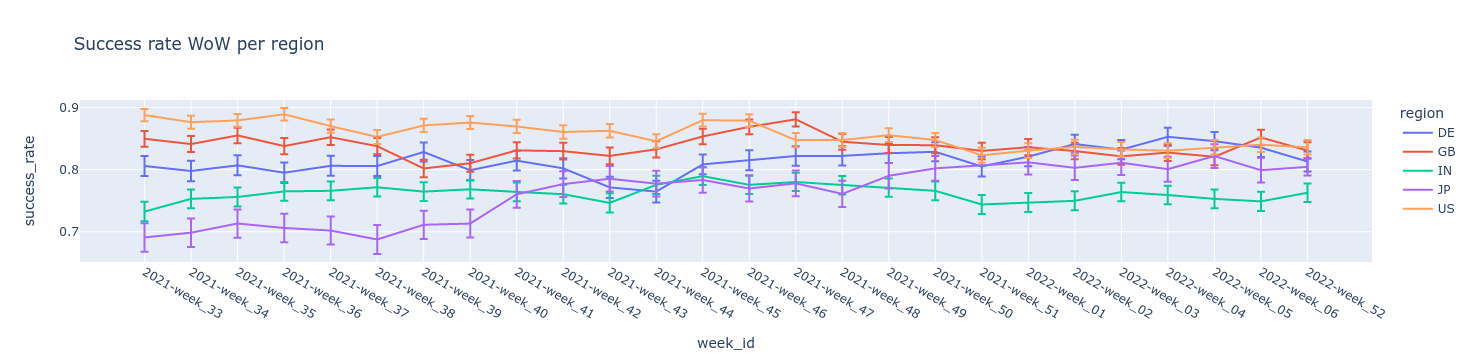

In [200]:
fig= px.line(df10.reset_index(), x='week_id', y='success_rate',error_y='CI_range',color='region', title='Success rate WoW per region')
fig.show()

#### A to Q23:

In [247]:
df11=df.groupby(['week_id','region','recommendation_type']).is_success.value_counts(normalize=True).unstack('is_success')['yes'].rename('success_rate').to_frame()
df11['sample_size']=df.groupby(['week_id','region','recommendation_type']).is_success.count()

df11['CI_95_low'] =df10.apply(lambda x:CI_prob(x['success_rate'],x['sample_size'],0.05,'low') ,axis=1)
df11['CI_95_high']=df10.apply(lambda x:CI_prob(x['success_rate'],x['sample_size'],0.05,'high'),axis=1)
df11['CI_range']=df10.apply(lambda x:CI_prob(x['success_rate'],x['sample_size'],0.05,'range'),axis=1)
df11


success_rate  sample_size  CI_95_low  \
week_id      region recommendation_type                                         
2021-week_33 DE     Qality                   0.805556         1908   0.797763   
                    Yield                    0.806982          487   0.797763   
             GB     Qality                   0.854478         2680   0.843348   
                    Yield                    0.824000          500   0.843348   
             IN     Qality                   0.750683         1464   0.724648   
...                                               ...          ...        ...   
2022-week_52 IN     Yield                    0.729029         1812   0.755263   
             JP     Qality                   0.811794         2832   0.797495   
                    Yield                    0.745714          350   0.797495   
             US     Qality                   0.877598         1299   0.830061   
                    Yield                    0.815858         2699   0.830061   

                                         CI_95_high  CI_range  
week_id      region recommendation_type                        
2021-week_33 DE     Qality                 0.813928  0.016165  
                    Yield                  0.813928  0.016165  
             GB     Qality                 0.856023  0.012675  
                    Yield                  0.856023  0.012675  
             IN     Qality                 0.740308  0.015660  
...                                             ...       ...  
2022-week_52 IN     Yield                  0.770342  0.015079  
             JP     Qality                 0.811556  0.014060  
                    Yield                  0.811556  0.014060  
             US     Qality                 0.841775  0.011714  
                    Yield                  0.841775  0.011714  

[258 rows x 5 columns]

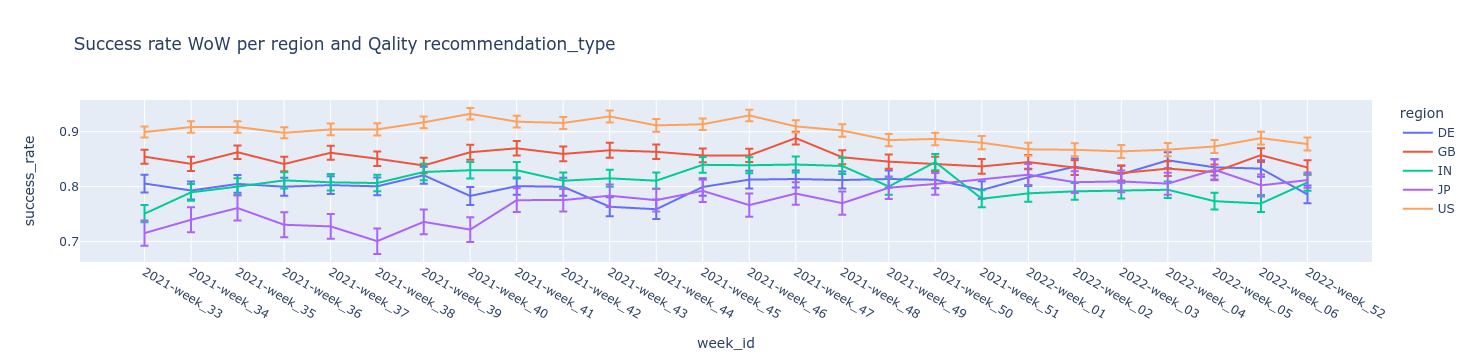

In [207]:
fig= px.line(df11.reset_index().query("recommendation_type=='Qality'"), x='week_id', y='success_rate',error_y='CI_range',color='region', title='Success rate WoW per region and Qality recommendation_type')
fig.show()

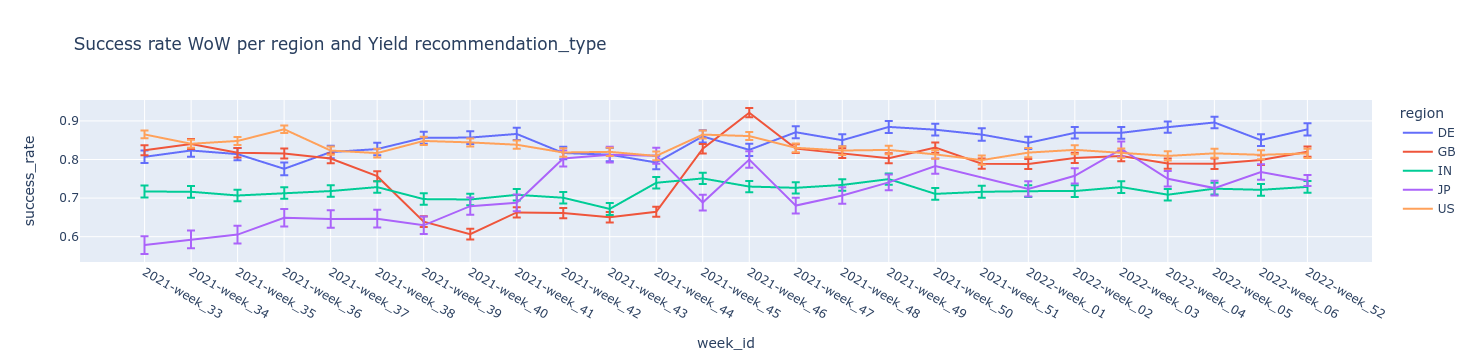

In [206]:
fig=px.line(df11.reset_index().query("recommendation_type=='Yield'"), x='week_id', y='success_rate',error_y='CI_range',color='region', title='Success rate WoW per region and Yield recommendation_type')
fig.show()


#### A to Q24

In [248]:
df12=df.groupby(['week_id','region','rec_provider']).is_success.value_counts(normalize=True).unstack('is_success')['yes'].rename('success_rate').to_frame()
df12['sample_size']=df.groupby(['week_id','region','rec_provider']).is_success.count()

df12['CI_95_low'] =df10.apply(lambda x:CI_prob(x['success_rate'],x['sample_size'],0.05,'low') ,axis=1)
df12['CI_95_high']=df10.apply(lambda x:CI_prob(x['success_rate'],x['sample_size'],0.05,'high'),axis=1)
df12['CI_range']=df10.apply(lambda x:CI_prob(x['success_rate'],x['sample_size'],0.05,'range'),axis=1)
df12

success_rate  sample_size  CI_95_low  \
week_id      region rec_provider                                         
2021-week_33 DE     BooksQ            0.838235           68   0.797763   
                    BooksY            0.975000           40   0.797763   
                    DNNQ              0.827804         1266   0.797763   
                    DNNY              0.906593          182   0.797763   
                    ManualQ           0.865385           52   0.797763   
...                                        ...          ...        ...   
2022-week_52 US     RuleBasedY        0.521951          410   0.830061   
                    UserPopQ          0.759259           54   0.830061   
                    UserPopY          0.650943          318   0.830061   
                    XGBQ              0.763441           93   0.830061   
                    XGBY              0.902256          133   0.830061   

                                  CI_95_high  CI_range  
week_id      region rec_provider                        
2021-week_33 DE     BooksQ          0.813928  0.016165  
                    BooksY          0.813928  0.016165  
                    DNNQ            0.813928  0.016165  
                    DNNY            0.813928  0.016165  
                    ManualQ         0.813928  0.016165  
...                                      ...       ...  
2022-week_52 US     RuleBasedY      0.841775  0.011714  
                    UserPopQ        0.841775  0.011714  
                    UserPopY        0.841775  0.011714  
                    XGBQ            0.841775  0.011714  
                    XGBY            0.841775  0.011714  

[1212 rows x 5 columns]

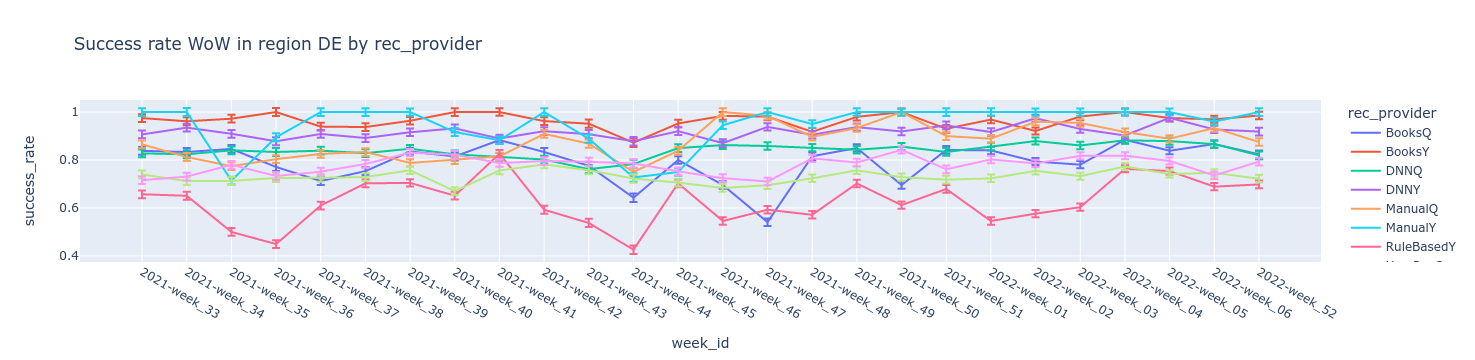

In [208]:
fig=px.line(df12.reset_index().query("region=='DE'"), x='week_id', y='success_rate',error_y='CI_range',color='rec_provider', title='Success rate WoW in region DE by rec_provider')
fig.show()


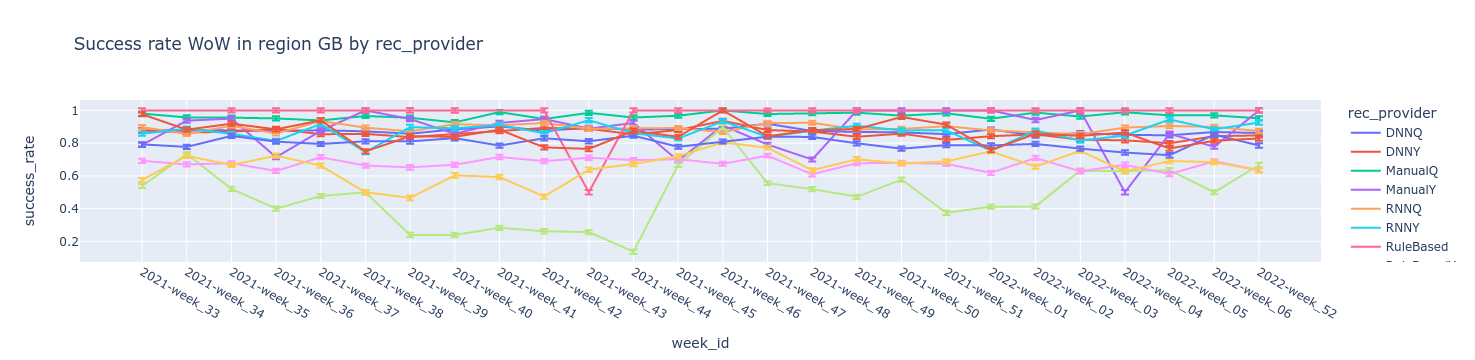

In [209]:
fig=px.line(df12.reset_index().query("region=='GB'"), x='week_id', y='success_rate',error_y='CI_range',color='rec_provider', title='Success rate WoW in region GB by rec_provider')
fig.show()


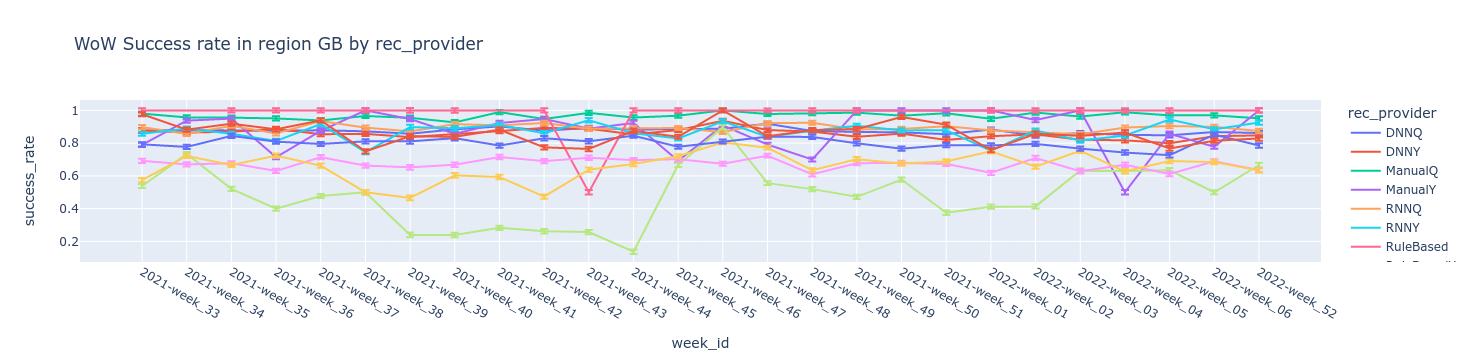

In [211]:
fig=px.line(df12.reset_index().query("region=='GB'"), x='week_id', y='success_rate',error_y='CI_range',color='rec_provider', title='WoW Success rate in region GB by rec_provider')
fig.show()

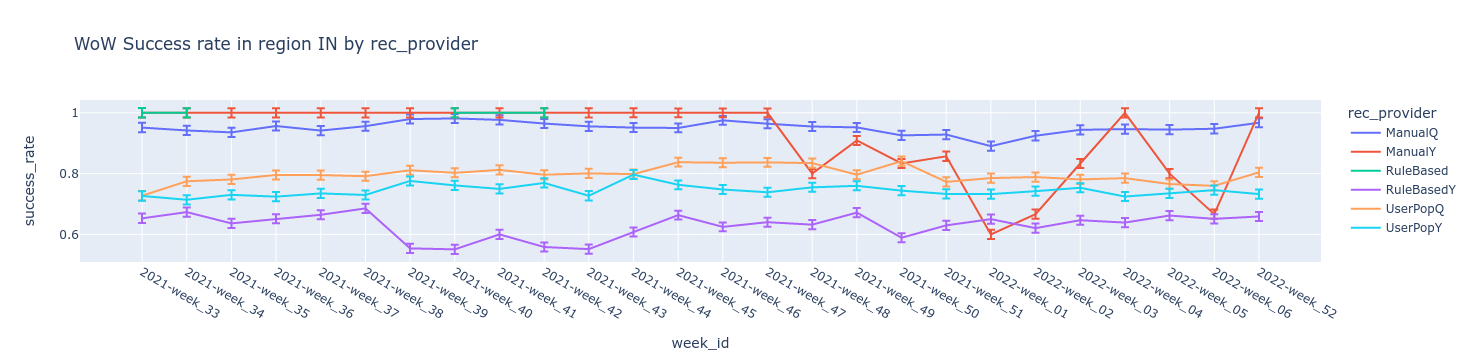

In [212]:
fig=px.line(df12.reset_index().query("region=='IN'"), x='week_id', y='success_rate',error_y='CI_range',color='rec_provider', title='WoW Success rate in region IN by rec_provider')
fig.show()

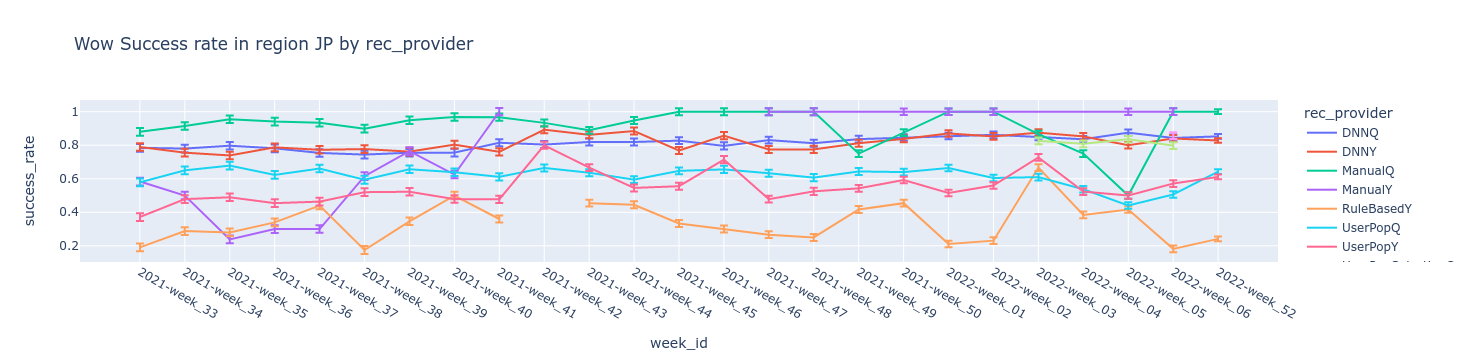

In [213]:
fig=px.line(df12.reset_index().query("region=='JP'"), x='week_id', y='success_rate',error_y='CI_range',color='rec_provider', title='Wow Success rate in region JP by rec_provider')
fig.show()

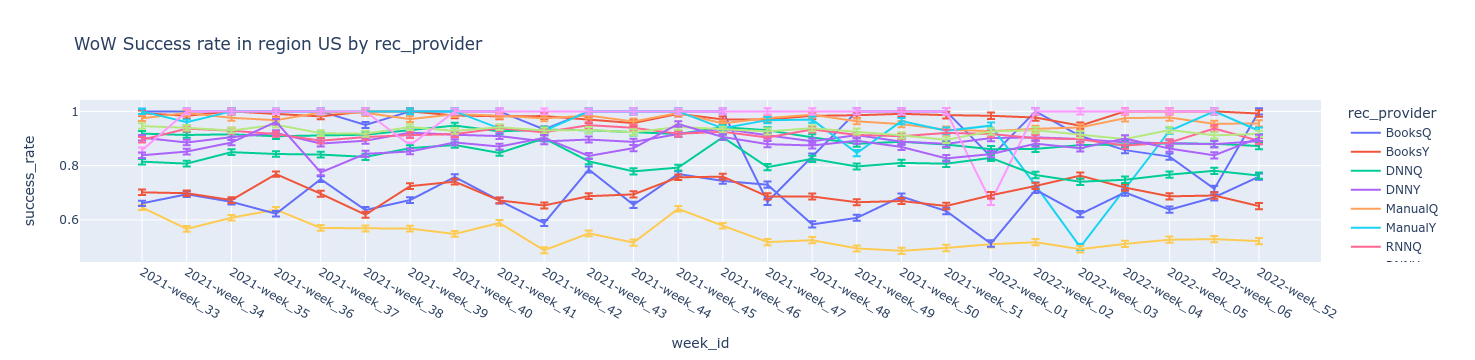

In [214]:
fig=px.line(df12.reset_index().query("region=='US'"), x='week_id', y='success_rate',error_y='CI_range',color='rec_provider', title='WoW Success rate in region US by rec_provider')
fig.show()

#### A to Q25

In [191]:
df.groupby('requester').is_success.value_counts(normalize=True).unstack('is_success')['yes'].rename('success_rate').to_frame().sort_values(by='success_rate', ascending=False)

,success_rate
requester,
Altammune,1.000000
Cue,1.000000
Derceto,1.000000
FlagTap,1.000000
Marketo Japan,1.000000
Metranome,0.970588
PageBites,0.911111
"Doctorfun Entertainment, Ltd",0.892157
Tab Solutions,0.889800


#### A to Q26

In [192]:
df.groupby(['requester','is_success']).is_sever.value_counts(normalize=True).unstack('is_success')['no'].unstack('is_sever')[True].rename('sever_rate').to_frame().sort_values(by='sever_rate', ascending=False)


,sever_rate
requester,
PureSafe water systems,1.000000
Glory Medical,1.000000
Joules Clothing,1.000000
Jun Group,1.000000
Metranome,1.000000
Modanisa,0.899873
Fancy,0.812124
Cuiker,0.800000
Tab Solutions,0.766553


#### A to Q29

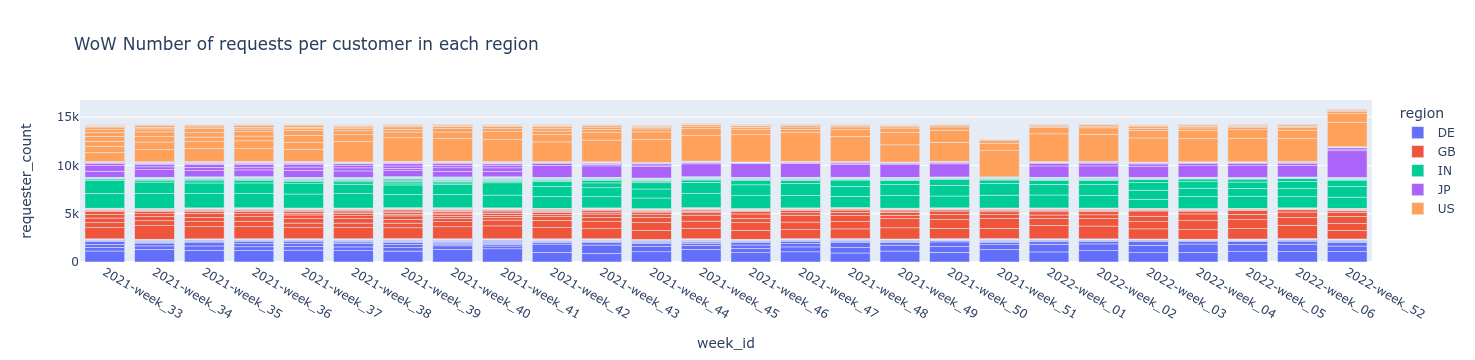

In [216]:
df13=df.groupby(['week_id','region']).requester.value_counts().rename('requester_count').reset_index()
fig=px.bar(df13, x='week_id', y='requester_count',color='region', title='WoW Number of requests per customer in each region ')
fig.show()

#### A to Q31

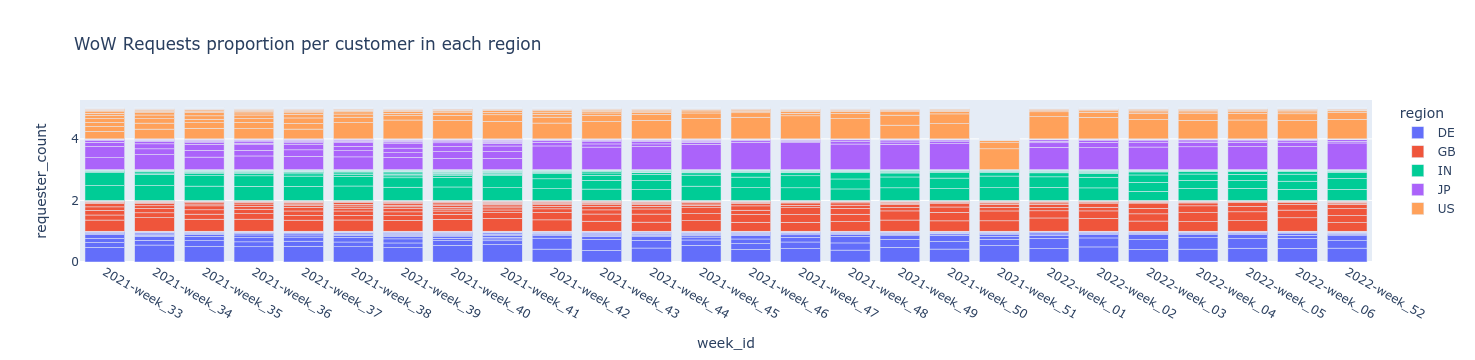

In [217]:
df14=df.groupby(['week_id','region']).requester.value_counts(normalize=True).rename('requester_count').reset_index()
fig=px.bar(df14, x='week_id', y='requester_count',color='region', title='WoW Requests proportion per customer in each region ')
fig.show()

In [195]:
df.groupby('region').is_success.count()

region
DE     62177
GB     82984
IN     83154
JP     41627
US    103846
Name: is_success, dtype: int64

Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

### Compactization

* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [196]:
import os
weekly_files = os.listdir('./data/weekly/')
sorted(weekly_files)[:10]

['.ipynb_checkpoints',
 '2021_33_DE_Qality_annotation_result.csv',
 '2021_33_DE_Yield_annotation_result.csv',
 '2021_33_DE__Sample.csv',
 '2021_33_GB_Qality_annotation_result.csv',
 '2021_33_GB_Yield_annotation_result.csv',
 '2021_33_GB__Sample.csv',
 '2021_33_IN_Qality_annotation_result.csv',
 '2021_33_IN_Yield_annotation_result.csv',
 '2021_33_IN__Sample.csv']

In [197]:
path='./data/weekly/'
file_name=path+weekly_files[2]
df_m=pd.read_csv(file_name)
df_m['week_id']=weekly_files[0][:4]+'-week'+weekly_files[0][4:7]
df_m['recommendation_type']='Qality' if weekly_files[0][11]=='Q' else 'Yield'  

len(df.columns.to_list())
len(df_m.columns.to_list())



# def read_csv_andinsert_col(file_name,text):
#     file=pd.read_csv(file_name)
#     for row in file:
#         row.insert(0,text)
        
        
    

# import glob
# filepaths = [f for f in os.listdir('./data/weekly/') if f.endswith('.csv')]
# df_merge = pd.concat(map(pd.read_csv, filepaths))

# df_mereg = pd.concat(map(pd.read_csv, glob.glob('data/weekly/*.csv')))

# for row in csv_reader:
#         # Append the default text in the row / list
#         row.append(default_text)
#         # Add the updated row / list to the output file
#         csv_writer.writerow(row)




6

Your task is to reconstruct the dataset above. 

### Visualizations

Produce the following success rate graph per region:

Produce the following requestser proportion graph:

## Appendix

Code to create weekly files:

In [198]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)